# Time series test 

This is mostly testing for the ARIMA model but there is a key part in cell 20-86(?) that produces the output CSV of ARIMA predictions used for the combination model with RF. 

In [2]:
import pickle
import pandas as pd
print(pd.__version__)

with open('toy_data.pkl','rb') as f:
    data = pickle.load(f)

2.0.1


In [3]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (8,6)
mpl.rcParams['axes.grid'] = False

In [4]:
df = data.dropna(axis=1,how='all')

df.head

<bound method NDFrame.head of            1-ACYLGLYCEROL-3-P-ACYLTRANSFER-MONOMER[i]   
0   [130, 130, 135, 139, 145, 149, 154, 162, 165, ...  \
1   [132, 132, 131, 131, 131, 133, 138, 140, 147, ...   
2   [149, 149, 148, 148, 148, 149, 154, 159, 164, ...   
3   [129, 134, 146, 149, 149, 149, 152, 158, 163, ...   
4   [173, 173, 173, 173, 173, 173, 172, 176, 183, ...   
5   [153, 154, 160, 161, 161, 161, 161, 161, 161, ...   
6   [135, 135, 135, 135, 135, 135, 134, 139, 150, ...   
7   [121, 126, 129, 130, 130, 130, 130, 130, 130, ...   
8   [130, 129, 134, 142, 148, 156, 156, 156, 156, ...   
9   [129, 129, 132, 140, 146, 153, 160, 167, 174, ...   
10  [139, 139, 139, 138, 144, 147, 147, 147, 147, ...   
11  [135, 139, 140, 140, 140, 144, 147, 154, 154, ...   
12  [65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 6...   
13  [81, 81, 83, 83, 83, 83, 83, 83, 83, 83, 83, 8...   
14  [107, 107, 107, 106, 106, 108, 108, 108, 108, ...   
15  [129, 129, 129, 129, 129, 129, 131, 131, 132, ...   
1

In [5]:
plot_cols = ['cellMass','proteinMass','rnaMass','time']
plot_all = df.iloc[4][plot_cols]

plot_ID = df.iloc[4,-4:]

plot_features = plot_all.iloc[0:3]
time = plot_all[3]

plot_df = pd.DataFrame(plot_features.values.tolist(),index=plot_features.index,columns=time)

plot_df = plot_df.T

generation                                    generation_000004
gene_ko                                                    yidC
cell_id                                                  000000
cell_path     /user/work/co18263/out/20230903.091338__KO_6ge...
Name: 4, dtype: object


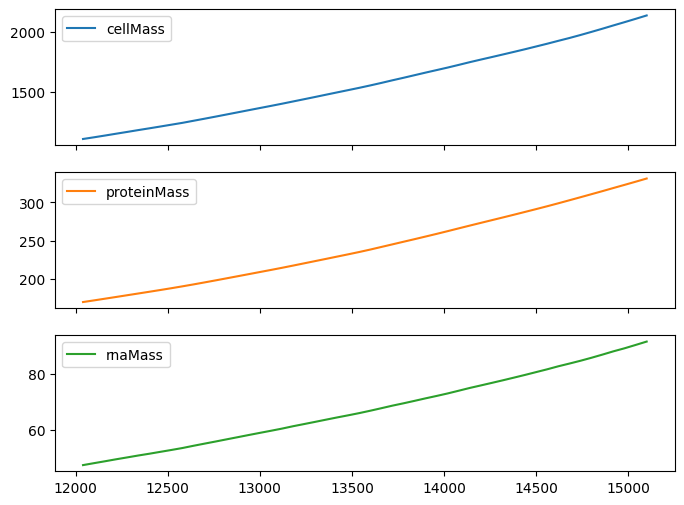

In [6]:
_=plot_df.plot(subplots=True)

print(plot_ID)

In [7]:
df['generation'] = df['generation'].apply(lambda x: int(x.split('_')[-1]))

C:\Users\gavla\AppData\Local\Temp\ipykernel_10696\408851615.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['generation'] = df['generation'].apply(lambda x: int(x.split('_')[-1]))


In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
generation,27.0,2.333333,1.732051,0.0,1.0,2.0,4.0,5.0


In [9]:
end = 2352
time_steps = []
n = 1
while True:
    time_steps.append(500*n)
    if time_steps[-1]>end:
        break
    else:
        n+=1


print(time_steps)

[500, 1000, 1500, 2000, 2500]


In [10]:


with open("toy_data.pkl",'rb') as f:
    data = pickle.load(f)
    data = data[data['generation']!='generation_000000']
    print(data['generation'])
    desired_time_step = 500
    num_steps_list = []
    for times in data['time']:
        try:
            num_steps_list.append(int((max(times)-min(times))/desired_time_step)+1)
        except:
            num_steps_list.append(0)
    data['num_steps'] = num_steps_list
    output = []
    for _,row in data.iterrows():      
        for step in range(row['num_steps']):
            current_time_step = min(row['time']) + step * desired_time_step
            index = min(range(len(row['time'])),key=lambda i: abs(row['time'][i] - current_time_step))
            try:
                cell_data = {
                    "cell": row['cell_id'],
                    "cellMass": row['cellMass'][index],
                    "rnaMass": row['rnaMass'][index],
                    "proteinMass": row['proteinMass'][index],
                    "time": row['time'][index]
                }
                output.append(cell_data)
            except:
                print(row['cell_id'])
df_result=pd.DataFrame(output)

#df_result.to_csv("extractedValues.csv",index=False)

0     generation_000003
1     generation_000005
2     generation_000001
4     generation_000004
5     generation_000002
6     generation_000003
7     generation_000005
8     generation_000001
10    generation_000004
11    generation_000002
12    generation_000003
13    generation_000005
14    generation_000001
16    generation_000004
17    generation_000002
18    generation_000003
19    generation_000005
20    generation_000001
22    generation_000004
23    generation_000002
24    generation_000001
26    generation_000002
Name: generation, dtype: object


In [11]:
headers = list(data.columns.values)
print(headers[-12:-1])

['growth', 'cellMass', 'proteinMass', 'rnaMass', 'time', 'date_of_sim', 'media', 'generation', 'gene_ko', 'cell_id', 'cell_path']


In [12]:
print (cell_data)
print(output)

{'cell': '000000', 'cellMass': 11598.221987654357, 'rnaMass': 50.372012801633545, 'proteinMass': 45.56155697789269, 'time': 21281.0}
[{'cell': '000000', 'cellMass': 1034.2482988417298, 'rnaMass': 44.276171976076455, 'proteinMass': 160.6222132325233, 'time': 8692.0}, {'cell': '000000', 'cellMass': 1146.1838138568135, 'rnaMass': 48.990962095668415, 'proteinMass': 177.86952961675044, 'time': 9172.0}, {'cell': '000000', 'cellMass': 1281.120140283408, 'rnaMass': 54.94741792756601, 'proteinMass': 199.98404660470771, 'time': 9712.0}, {'cell': '000000', 'cellMass': 1423.563568358849, 'rnaMass': 61.48322473320935, 'proteinMass': 222.79876371004644, 'time': 10192.0}, {'cell': '000000', 'cellMass': 1621.9936013324339, 'rnaMass': 69.06670048636164, 'proteinMass': 249.25336774943796, 'time': 10672.0}, {'cell': '000000', 'cellMass': 1832.7191248354948, 'rnaMass': 78.09309295115517, 'proteinMass': 282.6374516413894, 'time': 11212.0}, {'cell': '000000', 'cellMass': 2041.2868611867355, 'rnaMass': 86.99

In [13]:
data = data[data['generation']!='generation_000000']
num_steps_list = []
#setting up how many timesteps for each simulation
for times in data['time']:
    try:
        num_steps_list.append(int((max(times)-min(times))/desired_time_step)+1)
    except:
        num_steps_list.append(0)
data['num_steps'] = num_steps_list
output = []
for _,row in data.iterrows():
    iter = 0
    for step in range(row['num_steps']):
        iter+=1
        current_time_step = min(row['time']) + step * desired_time_step
        index = min(range(len(row['time'])),key=lambda i: abs(row['time'][i] - current_time_step))
        if iter >=5 and iter == row['num_steps']:
            label = 1
        else:
            label = 0
        try:
            cell_data = {
                "cell": row['cell_id'],
                "gene_ko":row['gene_ko'],
                "generation":row['generation'],
                "cellMass": row['cellMass'][index],
                "rnaMass": row['rnaMass'][index],
                "proteinMass": row['proteinMass'][index],
                "time": row['time'][index],
                "label":label
                   }
            output.append(cell_data)
        except:
            print(row['cell_id'])
df_features=pd.DataFrame(output)

In [14]:
from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

results = {}
train_size = 43
timeSeries = data[['cellMass', 'time']]
timeSeries = timeSeries.iloc[:-2]

maeList = []
mseList = []
mapeList = []

for _,row in timeSeries.iterrows():

    d = row['cellMass']
    t = row['time']
    train_data = d[:train_size]
    test_data = d[train_size:]

    model = auto_arima(train_data, seasonal = False, trace=True)
    forecast, conf_int = model.predict(n_periods=len(test_data), return_conf_int=True)
    results[f'Time series {_+1}'] = model

    mae = mean_absolute_error(test_data, forecast)
    mse = mean_squared_error(test_data, forecast)
    mape = mean_absolute_percentage_error(test_data,forecast)

    maeList.append(mae)
    mseList.append(mse)
    mapeList.append(mape)

metricsDict = {"Mean absolute error":maeList, "Mean squared error":mseList, "Mean absolute percentage error":mapeList}
metricsFrame = pd.DataFrame(metricsDict)


# plt.figure()
# plt.plot(t, d, label = 'cell data')
# plt.plot(t[train_size:], forecast, label='Forecasted Data')

# plt.xlabel('Time')
# plt.ylabel('Cell Mass')

# plt.legend
# plt.show()

# plt.plot(df.index, df['Mean absolute error'], label='Mean absolute error')

# plt.xlabel('Index')
# plt.ylabel('Metric')

fig, axes = plt.subplots(3,1,figsize=(10,10))

metricsFrame['Mean absolute error'].plot(ax=axes[0], color='blue')
axes[0].set_title('Mean absolute error')
axes[0].set_xlabel('Index')
axes[0].set_ylabel('Mean absolute error \ fg')
metricsFrame['Mean squared error'].plot(ax=axes[1], color='red')
axes[1].set_title('Mean squared error')
axes[1].set_xlabel('Index')
axes[1].set_ylabel('Mean squared error \ fg^2')
metricsFrame['Mean absolute percentage error'].plot(ax=axes[2], color='green')
axes[2].set_title('Mean absolute percentage error')
axes[2].set_xlabel('Index')
axes[2].set_ylabel('Mean absolute percentage error')

plt.tight_layout()

plt.show()



Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.30 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=261.021, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=255.688, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=259.059, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=254.365, Time=0.03 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=254.634, Time=0.06 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=252.631, Time=0.03 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=253.818, Time=0.02 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=253.068, Time=0.04 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=251.394, Time=0.04 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=249.415, Time=0.03 sec
 A

KeyboardInterrupt: 

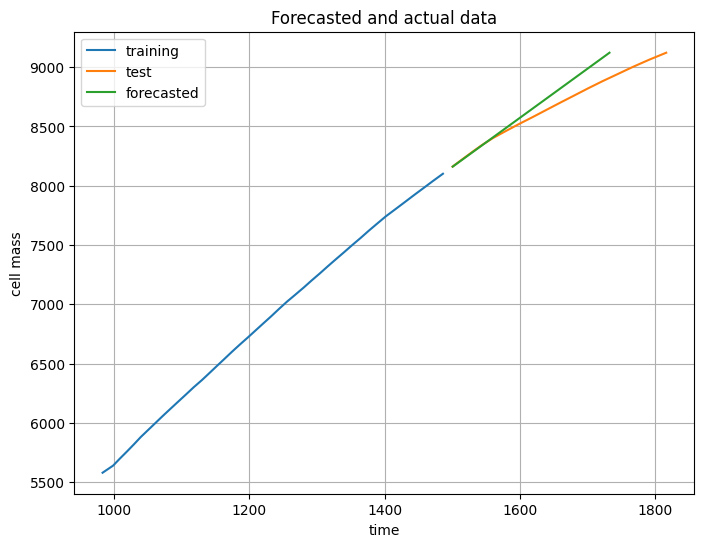

In [ ]:
plt.figure()
plt.plot(d[:train_size],t[:train_size],label='training')
plt.plot(d[train_size:],t[train_size:],label='test')
plt.plot(forecast,t[train_size:],label='forecasted')

plt.xlabel('time')
plt.ylabel('cell mass')
plt.title('Forecasted and actual data')
plt.legend()
plt.grid(True)


In [15]:
def extractNumericPart(value):
    return int(value.split('_')[-1])
koData = df[df['gene_ko']=='yidC']
koData = koData.sort_values(by='generation')
koData = koData[['generation','gene_ko','cellMass', 'time']]
massList = []
timeList = []
for _,row in koData.iterrows():
    massList.append(row['cellMass'])
    timeList.append(row['time'])

# for row in timeList:


massList1d = [item for row in massList for item in row]
timeList1d = [item for row in timeList for item in row]

# plt.figure()
# plt.plot(massList1d, timeList1d,label='cell mass over time')
# plt.xlabel('time /s')
# plt.ylabel('cell mass /fg')
# plt.title('cell mass over time for one gene knockout across multiple generations')
# plt.show()

In [4]:
with open("df_wildtype_bm_1.pkl", 'rb') as f:
    data = pickle.load(f)



In [ ]:

lastCols = data.columns[:10]

print(lastCols)



Index(['date_of_sim', 'media', 'gene_ko', 'cell_id', 'generation', 'time',
       'growth', 'cellMass', 'proteinMass', 'rnaMass'],
      dtype='object')


In [5]:
data = data[['cellMass','time','generation']]
data = data.head(6)
data['generation'] = data['generation'].apply(lambda x: int(x.split('_')[-1]))
data = data.sort_values(by='generation')
print(data)


                                            cellMass   
3  [1104.2249595758183, 1116.2315816779444, 1132....  \
2  [1075.5751200706275, 1089.4862748145642, 1102....   
5  [1000.0688898627238, 1013.5323223576958, 1025....   
0  [921.6266243557416, 926.7117195022839, 934.395...   
4  [979.8227126237746, 1002.9434369709436, 1014.3...   
1  [912.2661040091465, 924.0320740537674, 931.758...   

                                                time  generation  
3  [0.0, 60.0, 120.0, 180.0, 240.0, 300.0, 360.0,...           0  
2  [3173.0, 3233.0, 3293.0, 3353.0, 3413.0, 3473....           1  
5  [6311.0, 6371.0, 6431.0, 6491.0, 6551.0, 6611....           2  
0  [9789.0, 9849.0, 9909.0, 9969.0, 10029.0, 1008...           3  
4  [13772.0, 13832.0, 13892.0, 13952.0, 14012.0, ...           4  
1  [17364.0, 17424.0, 17484.0, 17544.0, 17604.0, ...           5  


In [6]:
massList = []
timeList = []

for _,row in data.iterrows():
    massList.append(row['cellMass'])
    timeList.append(row['time'])



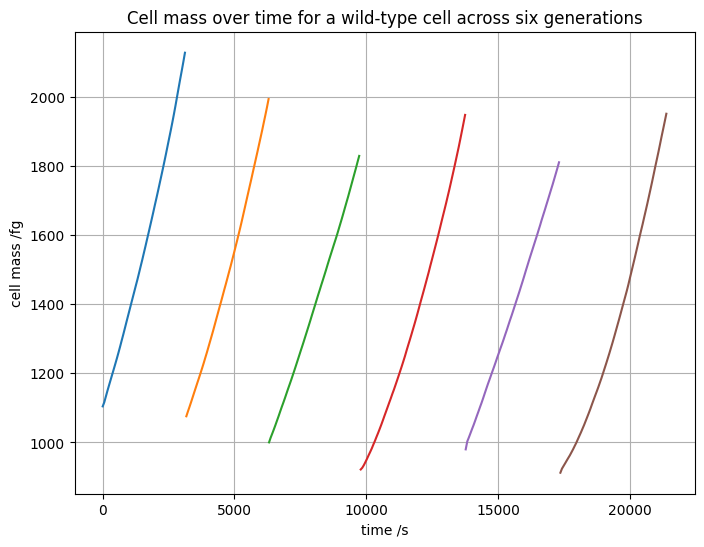

In [10]:
for row_idx, (row_timeList, row_massList) in enumerate(zip(timeList, massList)):
    plt.plot(row_timeList, row_massList, label=f'Row {row_idx+1}')

plt.xlabel('time /s')
plt.ylabel('cell mass /fg')
plt.title("Cell mass over time for a wild-type cell across six generations")
# plt.legend()
plt.grid(True)
plt.savefig("6genswild.pdf", format='pdf', bbox_inches='tight')


Text(0.5, 1.0, 'Cell mass over time for a wild-type cell across a single generation')

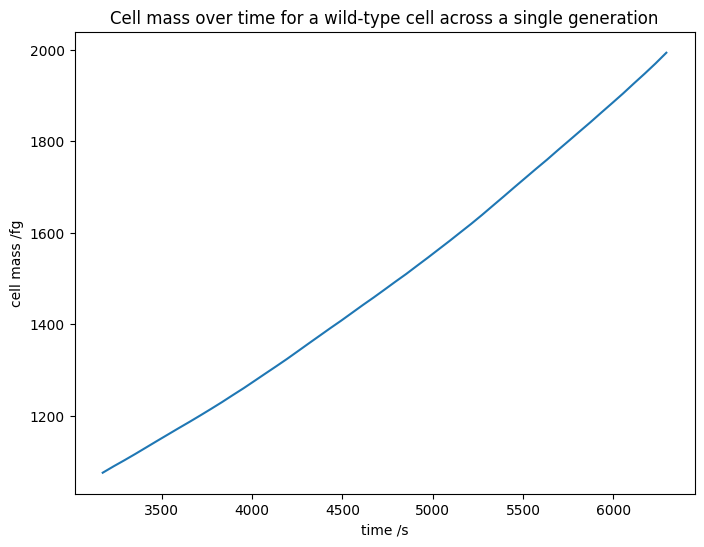

In [ ]:
i = 0
for row_idx, (row_timeList, row_massList) in enumerate(zip(timeList, massList)):
    if i==1:
        plt.plot(row_timeList, row_massList, label=f'Row {row_idx+1}')
        break
    i+=1
plt.xlabel('time /s')
plt.ylabel('cell mass /fg')
plt.title("Cell mass over time for a wild-type cell across a single generation")

In [17]:
sorted_df = df.sort_values(by=['gene_ko','generation'],kind='mergesort')
koData = sorted_df[['generation','gene_ko','cellMass', 'time']]
koDataExp = koData.explode('cellMass')
koDatat = koData.explode('time')
koDataExp['time'] = koDatat['time']

print(koDataExp['cellMass'])

# koDataExp.to_csv("test.csv", index=False)
    



25    1319.207672
25    1330.478355
25    1339.344861
25    1345.315653
25    1350.501594
         ...     
1     2158.189855
1     2190.580785
1     2223.754067
1     2257.303073
1     2291.520808
Name: cellMass, Length: 1636, dtype: object


In [18]:
from pmdarima import auto_arima
unique_gene_ko = koDataExp['gene_ko'].unique()

# for gene_ko in unique_gene_ko:
df_gene_ko = koDataExp[koDataExp['gene_ko']=='glmU']

y = df_gene_ko['cellMass']
trainLen = round(0.8*len(y))
trainY = y[:trainLen]
testY = y[trainLen:]
traindf = df_gene_ko.iloc[:trainLen]
testdf = df_gene_ko.iloc[trainLen:]

seasons = traindf['generation'].nunique()

model = auto_arima(trainY, seasonal=True, m=seasons)


print(f"Summary for gene_ko '{'glmU'}':")
print(model.summary())
    # break

Summary for gene_ko 'glmU':
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  262
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -1630.472
Date:                Sat, 13 Apr 2024   AIC                           3262.943
Time:                        19:19:41   BIC                           3266.508
Sample:                             0   HQIC                          3264.376
                                - 262                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.562e+04    243.233     64.209      0.000    1.51e+04    1.61e+04
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):             44142.90
Prob(Q):           

c:\Users\gavla\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


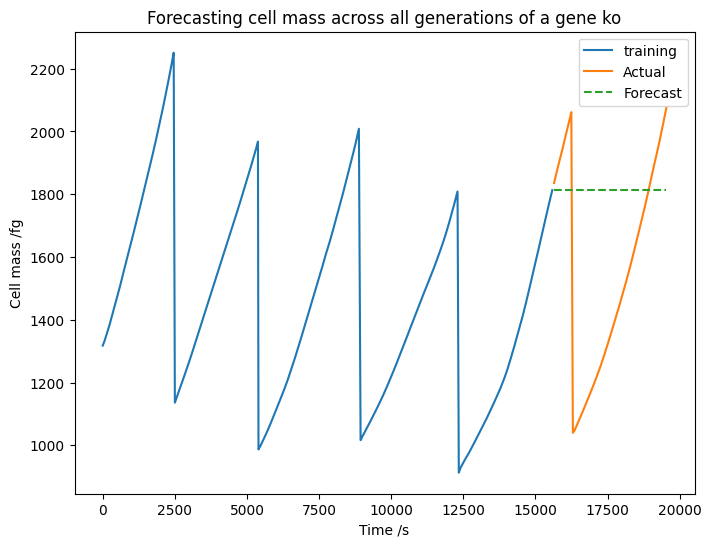

In [19]:
forecast = model.predict(n_periods=len(testY))

plt.plot(traindf['time'], trainY, label='training')
plt.plot(testdf['time'],testY,label='Actual')
plt.plot(testdf['time'], forecast, label="Forecast", linestyle='--')

plt.title("Forecasting cell mass across all generations of a gene ko")
plt.xlabel("Time /s")
plt.ylabel("Cell mass /fg")
plt.legend()

In [20]:
df_gene_ko = koDataExp[koDataExp['gene_ko']=='glmU']

gens = df_gene_ko['generation'].unique()
predictions = []
actual = []
trimes = []
teimes = []
for gen in gens:
    dfGen = df_gene_ko[df_gene_ko['generation']==gen]
    trainLen = round(0.5*len(dfGen))
    traindf = dfGen.iloc[:trainLen]
    testdf = dfGen.iloc[trainLen:]

    model = auto_arima(traindf['cellMass'],seasonal=False)#, trace=True)
    forecast = [model.predict(len(dfGen)-trainLen)]
    predictions.append(forecast)
    actual.append([dfGen['cellMass']])
    trimes.append([dfGen['time']])
    teimes.append([testdf['time']])

print(actual)
    



c:\Users\gavla\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\gavla\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\gavla\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\gavla\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an int

[[9    1317.658193
9    1331.654868
9     1348.53509
9     1366.50371
9    1384.776675
9    1404.660262
9    1425.476857
9    1445.782508
9    1465.997038
9    1486.455735
9     1507.06428
9    1528.617429
9    1551.033955
9    1573.180248
9    1594.627124
9    1616.331667
9    1637.551333
9    1658.763948
9    1680.615619
9    1702.690639
9    1724.860606
9    1747.098655
9    1769.944072
9    1792.675923
9    1814.953386
9      1837.7755
9    1860.318994
9    1883.480442
9    1906.871241
9    1930.307163
9    1953.960115
9    1978.717883
9    2004.047121
9    2029.124035
9    2054.709201
9    2080.228359
9     2107.46297
9    2134.946775
9      2162.7743
9     2191.07526
9    2220.531423
9    2250.804345
Name: cellMass, dtype: object], [8    1135.745175
8    1152.009765
8    1167.397319
8    1182.648267
8    1198.481868
8    1214.141036
8    1229.891506
8    1245.794841
8    1262.308255
8    1278.610217
8    1295.644039
8     1312.83356
8    1329.915652
8    1347.334909
8    1364.682

c:\Users\gavla\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Text(0, 0.5, 'cell mass /fg')

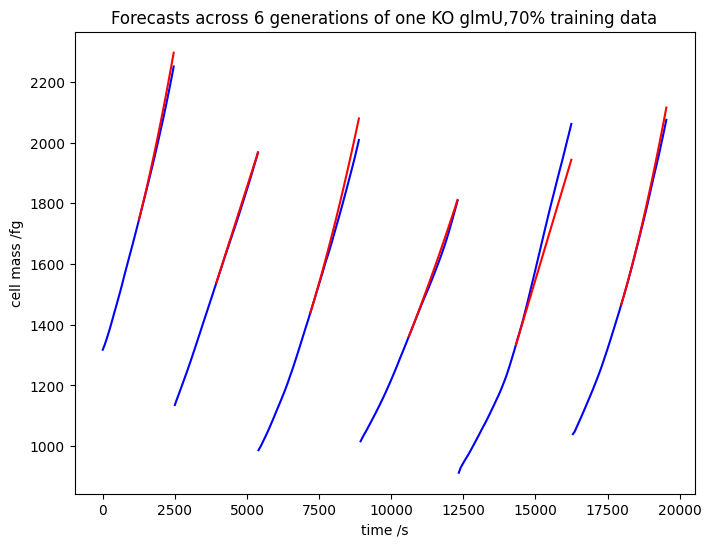

In [21]:
plt.figure()
for act, trme in zip(actual,trimes):
    for a, t in zip(act,trme):
        plt.plot(t,a,label='Training',color='b')

for pred, teme in zip(predictions, teimes):
    for p,te in zip(pred, teme):
        plt.plot(te,p,label='predicitons',color='r')


plt.title('Forecasts across 6 generations of one KO glmU,70% training data')
plt.xlabel('time /s')
plt.ylabel('cell mass /fg')




In [70]:

sub1 = actual[0]
subsub1 = sub1[0]
print(type(subsub1))

<class 'pandas.core.series.Series'>


In [75]:
def flatten(frame):
    flattened = []
    for sublist in frame:
        for item in sublist:
            flattened.extend(item)

In [84]:
trimesl = pd.concat([pd.concat(sublist) for sublist in trimes], ignore_index=True)
teimesl = pd.concat([pd.concat(sublist) for sublist in teimes], ignore_index=True)
actuall = pd.concat([pd.concat(sublist) for sublist in actual], ignore_index=True)
predl = pd.concat([pd.concat(sublist) for sublist in predictions], ignore_index=True)

In [85]:

outdf = pd.DataFrame({
    'actual': actuall,
    'train_times': trimesl,
    'predictions': predl,
    'test_times': teimesl
})

print(outdf)

          actual train_times  predictions test_times
0    1317.658193         0.0  1747.251826     1260.0
1    1331.654868        60.0  1770.124219     1320.0
2     1348.53509       120.0  1793.477787     1380.0
3     1366.50371       180.0  1817.312528     1440.0
4    1384.776675       240.0  1841.628442     1500.0
..           ...         ...          ...        ...
323  1967.602416     19295.0          NaN        NaN
324  1994.394099     19355.0          NaN        NaN
325  2020.663798     19415.0          NaN        NaN
326  2047.847437     19475.0          NaN        NaN
327  2075.117022     19535.0          NaN        NaN

[328 rows x 4 columns]


In [86]:

outdf.to_csv("arimaforecasts.csv",index=False)

In [ ]:
df_gene_ko = koDataExp[koDataExp['gene_ko']=='glmU']


predictions = []
teimes = []

traindf = df_gene_ko[df_gene_ko['generation'].isin([0])]
# testdf = df_gene_ko.drop(traindf.index)
testdf = df_gene_ko[df_gene_ko['generation'].isin([1])]

model = auto_arima(traindf['cellMass'],seasonal=False,trace=True)

gens = testdf['generation'].unique()
actual = traindf['cellMass']
trimes = traindf['time']
for g in gens:
    dfGen = df_gene_ko[df_gene_ko['generation']==gen]
    forecast = [model.predict(len(dfGen))]
    predictions.append(forecast)
    teimes.append([dfGen['time']])
    
    # trainLen = round(0.7*len(dfGen))
    # traindf = dfGen.iloc[:trainLen]
    # testdf = dfGen.iloc[trainLen:]

    # model = auto_arima(traindf['cellMass'],seasonal=False)#, trace=True)
    # forecast = [model.predict(len(dfGen)-trainLen)]
    # predictions.append(forecast)
    # actual.append([dfGen['cellMass']])
    # trimes.append([dfGen['time']])
    # teimes.append([testdf['time']])

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=86.513, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=87.142, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=86.909, Time=0.07 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=96.795, Time=0.01 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=88.695, Time=0.11 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0] intercept
Total fit time: 0.586 seconds


c:\Users\gavla\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Text(0, 0.5, 'cell mass /fg')

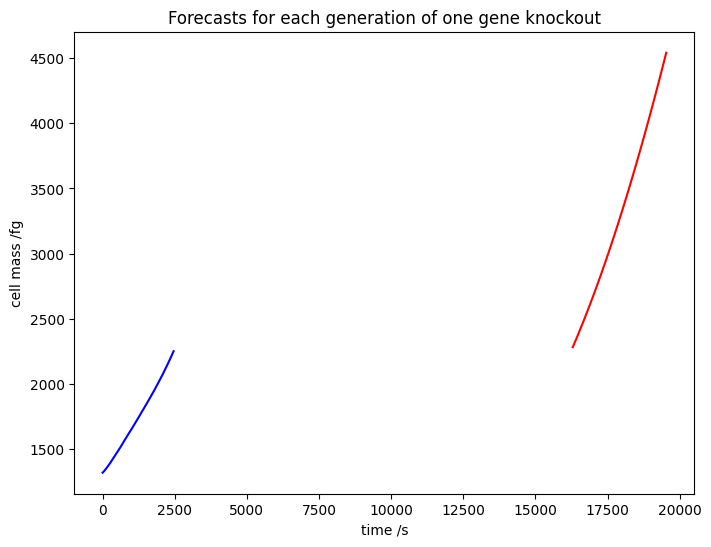

In [ ]:
plt.figure()
plt.plot(trimes,actual,label='Training',color='b')

for pred, teme in zip(predictions, teimes):
    for p,te in zip(pred, teme):
        plt.plot(te,p,label='predicitons',color='r')


plt.title('Forecasts for each generation of one gene knockout')
plt.xlabel('time /s')
plt.ylabel('cell mass /fg')


In [ ]:
def seriToSupervised(series, nIn=1, nOut=1, dropnan=True):
    
    nVars = 1 if type(series) is list else data.shape[1]
    df = pd.DataFrame(series)
    cols, names = list(),list()
    for i in range(nIn, 0,-1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)'%(j+1, i)) for j in range(nVars)]

    for i in range(0,nOut):
        cols.append(df.shift(-i))
        if i==0:
            names += [('var%d(t-%d)'%(j+1,i)) for j in range(nVars)]
        else:
            names += [('var%d(t+%d)'%(j+1, i)) for j in range(nVars)]

    agg = pd.concat(cols,axis=1)
    agg.columns = names

    if dropnan:
        agg.dropna(inplace=True)
        return agg


In [ ]:
series = koDataExp['cellMass']

supervised = seriToSupervised(series, 2,2)

ValueError: Length mismatch: Expected axis has 4 elements, new values have 66756 elements

In [ ]:
uniqueKOs = df['gene_ko'].unique()

trainKOs=uniqueKOs[:2]
testKOs=uniqueKOs[2:3]

trainSet = koDataExp[koDataExp['gene_ko'].isin(trainKOs)]
testSet = koDataExp[koDataExp['gene_ko'].isin(testKOs)]



y = [1000]
for _,row in trainSet.iterrows():
    y.append(row['cellMass'])

testY = testSet['cellMass']

trainSet.drop(columns=['gene_ko','cellMass'], inplace=True)
testSet.drop(columns=['gene_ko','cellMass'], inplace=True)

y = np.array(y, dtype=np.float64)
y = y[:-1]

trainVals = np.array(trainSet.values, dtype=np.float64)

testVals = np.array(testSet.values, dtype=np.float64)


25    1319.207672
25    1330.478355
25    1339.344861
25    1345.315653
25    1350.501594
         ...     
1     2158.189855
1     2190.580785
1     2223.754067
1     2257.303073
1     2291.520808
Name: cellMass, Length: 1636, dtype: object


C:\Users\gavla\AppData\Local\Temp\ipykernel_30860\1544467568.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainSet.drop(columns=['gene_ko','cellMass'], inplace=True)
C:\Users\gavla\AppData\Local\Temp\ipykernel_30860\1544467568.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testSet.drop(columns=['gene_ko','cellMass'], inplace=True)


In [ ]:
gens = koDataExp['generation'].unique()
kos = koDataExp['gene_ko'].unique()

kos = kos.tolist()
kos.remove('argH')

predictions = []
traindfs = []
testdfs = []
for ko in kos:
    dfk = koDataExp[koDataExp['gene_ko']==ko]
    gens = dfk['generation'].unique()
    for gen in gens:
        dfGen = dfk[dfk['generation']==gen]
        trainLen = round(0.7*len(dfGen))
        traindf = dfGen.iloc[:trainLen]
        testdf = dfGen.iloc[trainLen:]

  
        traindfs.append(traindf)
        testdfs.append(testdf)


traindf = pd.concat(traindfs, ignore_index=True)
testdf = pd.concat(testdfs, ignore_index=True)

y = [traindf['cellMass'].iloc[0]]
for _,row in traindf.iterrows():
    # print(row['cellMass'])
    y.append(row['cellMass'])

testY = [traindf['cellMass'].iloc[0]]
for _,row in testdf.iterrows():
    testY.append(row['cellMass'])

traindf.drop(columns=['cellMass', 'gene_ko'], inplace=True)
testdf.drop(columns=['cellMass','gene_ko'], inplace=True)

y = np.array(y, dtype=np.float64)
y = y[:-1]
testY = np.array(testY, dtype=np.float64)
testY = testY[:-1]

trainVals = np.array(traindf.values, dtype=np.float64)
testVals = np.array(testdf.values, dtype=np.float64)

# nSamples, nFeatures = trainVals.shape()
    

In [ ]:
trainlen = 3
trainkos = kos[:trainlen]
testkos = kos[trainlen:]
train_df = koDataExp[koDataExp['gene_ko'].isin(trainkos)]
test_df = koDataExp[koDataExp['gene_ko'].isin(testkos)]
val_df = koDataExp[koDataExp['gene_ko']=='argH']

Xtrn = train_df[train_df['generation']==0]
ytrn = train_df[~train_df.index.isin(Xtrn.index)]

XtrnVals = Xtrn.drop(columns=['gene_ko'])
XtrnVals = XtrnVals.values
ytrnVals = ytrn.drop(columns=['gene_ko'])
ytrnVals = ytrnVals.values

Xtest = test_df[test_df['generation']==0]
ytest = test_df[~test_df.index.isin(Xtest.index)]

XtestVals = Xtest.drop(columns=['gene_ko'])
XtestVals = XtestVals.values
ytestVals = ytest.drop(columns=['gene_ko'])

# XtrnVals = np.array(XtrnVals.values, dtype=np.float64)
ytrnVals = np.array(ytrnVals, dtype=np.float64)


In [ ]:
class WindowGenerator():
    def __init__(self, input_width ,label_width, shift,
                 train_df=train_df, val_df=val_df, test_df=test_df,
                 label_columns=None):
        #store raw data
        self.train_df = train_df
        self.val_df = val_df
        self.test_df = test_df

        #work out the label column indices
        self.label_columns = label_columns
        if label_columns is not None:
            self.label_columns_indices = {name: i for i, name in
                                          enumerate(label_columns)}
        self.columnsindices = {name: i for i, name in
                               enumerate(train_df.columns)}

        #work out the window params
        self.input_width = input_width
        self.label_width = label_width
        self.shift = shift

        self.total_window_size = input_width + shift

        self.input_slice = slice(0,input_width)
        self.input_indices = np.arrange(self.total_window_size)[self.input_slice]

        self.label_start = self.total_window_size - self.label_width
        self.labels_slice = slice(self.label_start, None)
        self.label_indices = np.arrange(self.total_window_size)[self.labels_slice]

    def __repr__(self):
        return '\n'.join([
            f'Total window size: {self.total_window_size}'
            f'Input indices: {self.input_indices}'
            f'Label indices: {self.label_indices}'
            f'Column name(s): {self.label_columns}'
        ])
    
    def split_window(self,features):
        inputs = features[:, self.input_slice,:]
        labels = features[:, self.labels_slice,:]
        if self.label_columns is not None:
            labels = tf.stack(
                [labels[:, :, self.label_columns_indices[name]] for name in self.label_columns],
                axis=-1
            )
        inputs.set_shaoe([None, self.input_width, None])
        labels.set_shape([None, self.label_width, None])

        return inputs, labels
    
    def make_dataset(self, data):
        data = np.array(data, dtype=np.float32)
        ds = tf.keras.utils.timeseries_dataset_from_array(
            data=data,
            targets=None,
            sequence_length=self.total_window_size,
            sequence_stride=1,
            shuffle=False,
            batch_size=32
        )

    @property
    def train(self):
        return self.make_dataset(self.train_df)
    @property
    def val(self):
        return self.make_dataset(self.val_df)
    @property
    def test(self):
        return self.make_dataset(self.test_df)
    
    @property
    def example(self):
        """
        Get and cache an example batch of 'inputs, labels` for plotting.
        """
        result=getattr(self, '_example', None)
        if result is None:
            #No example batch was found, so get one from the train dataset
            result = next(iter(self.train))
            #and cache for next time
            self._example = result

        return result

In [ ]:
# w2 = WindowGenerator(input_width=)

# example_window = tf.stack([np.array(train_df[:])])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


n_samples, n_features = XtrnVals.shape
X = XtrnVals.reshape(n_samples,1,n_features)
X = np.array(X, dtype=np.float64)

XtestVals = XtestVals.reshape((XtestVals.shape[0],X.shape[1],X.shape[2]))

model = Sequential()
model.add(LSTM(units=50, input_shape=(X.shape[1], X.shape[2])))
model.add(Dense(units=len(XtestVals)))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X, ytrnVals, epochs=100, batch_size=32)

model.summary

ValueError: Data cardinality is ambiguous:
  x sizes: 126
  y sizes: 841
Make sure all arrays contain the same number of samples.

In [ ]:
predictions = model.predict(testVals)

for i in predictions:
    print(i)
# print(testY)

13/13 [==============================] - 1s 2ms/step
[100.28053   99.024956  98.95184   99.31398   99.644714  99.19808
  99.00554   99.62224   99.496346  99.55539   99.166     99.302635
  99.111305  99.19464   98.73937   99.49509   99.623665  99.45511
  99.300934  98.918304  99.30501   99.647545  99.40777   99.40862
  98.9464    99.65853   98.80628   99.24925   99.64258   99.43772
  98.96655   99.96243   99.248985  98.88953   99.60712   99.217926
  99.827354  99.24177   99.83042   99.61837   99.01954   99.40647
 100.26128   99.06179   99.33822   99.13101   99.79826   98.995735
  99.485695  99.33041   99.18184   99.007     99.60078   98.4965
  98.817085  99.10546   99.404655  98.883606  99.14723   99.087616
 100.017815  99.44351   99.71439   99.03542   98.66163   99.70253
  99.28194   99.40322   99.05385   99.1465    98.993774  99.16257
  99.874146  99.56121   99.25305   99.637856  99.3127    99.84048
  99.293884  98.63553   99.16167   99.51173   99.85192   99.89749
  99.679276  99.1987

already in list format
already in list format
889
387
889
387
387


Text(0, 0.5, 'cell mass /fg')

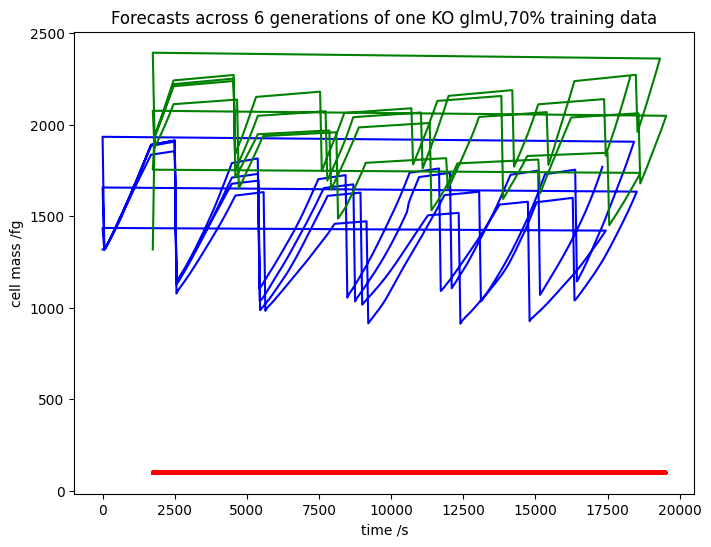

In [ ]:
trimes = traindf['time']

teimes = testdf['time']
try:
    y = y.tolist()
    testY = testY.tolist()
except:
    print("already in list format")
try:
    predictions = predictions.numpy()
except:
    print("already in list format")
try:
    predictions = predictions.tolist()
except:
    print("already in list format")

print(len(y))
print(len(testY))
print(len(trimes))
print(len(teimes))
print(len(predictions))

plt.figure()
# for act, trme in zip(y,trimes):
#     # for a, t in zip(act,trme):
#     plt.plot(trme,act,label='Training',color='b')

# for ty, teime in zip(testY, teimes):
#     # for t, te in zip(ty, teime):
#     plt.plot(teime, ty, label='Test',color='g')

# for pred, teme in zip(predictions, teimes):
#     # for p,te in zip(pred, teme):
#     plt.plot(teme,pred,label='predicitons',color='r')

plt.plot(trimes, y, label='Training',color='b')
plt.plot(teimes,testY, color='g')
plt.plot(teimes,predictions, label='Predictions',color='r')


plt.title('Forecasts across 6 generations of one KO glmU,70% training data')
plt.xlabel('time /s')
plt.ylabel('cell mass /fg')



In [ ]:
for i,row in testSet.iterrows():
    print(row)
    
    break

generation      0
time          0.0
Name: 15, dtype: object


In [ ]:
ids = df['cell_id'].unique()

print(ids)

lastCols = df.iloc[:3,-12:]
colsdf = pd.DataFrame(df.columns[-12:],columns=['Column'])
lastColsdf = pd.DataFrame(lastCols.values, columns=df.columns[-12:])

lastCols = pd.concat([colsdf,lastColsdf],axis=1)

lastCols.to_csv("cols.csv",index=False)

print(lastCols)

['000000']
          Column                                       valY-tRNA[c]  \
0   valY-tRNA[c]  [2, 1, 1, 2, 0, 1, 1, 0, 1, 1, 1, 0, 1, 2, 0, ...   
1         growth  [1, 0, 3, 2, 1, 1, 3, 0, 1, 0, 0, 0, 1, 2, 0, ...   
2       cellMass  [5, 0, 0, 1, 0, 2, 2, 1, 0, 1, 1, 1, 0, 4, 6, ...   
3    proteinMass                                                NaN   
4        rnaMass                                                NaN   
5           time                                                NaN   
6    date_of_sim                                                NaN   
7          media                                                NaN   
8     generation                                                NaN   
9        gene_ko                                                NaN   
10       cell_id                                                NaN   
11     cell_path                                                NaN   

                                               growth  \
0   [nan